## Import librairies and user-defined functions

In [1]:
import gc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.models.linear_models.pca_regression import pca_regression
from src.loaders.data_loader import load_energy_efficiency_dataset
from src.models.linear_models.ridge_pca_regression import ridge_pca_regression
from src.transformers.data_transformer import transform_energy_efficiency_dataset

## Import dataset

In [2]:
features_df, targets_df = load_energy_efficiency_dataset()


In [3]:
features_df.sample(n=3, random_state=123)


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
236,0.62,808.5,367.5,220.5,3.5,2.0,0.10,4.0
395,0.86,588.0,294.0,147.0,7.0,5.0,0.25,3.0
36,0.66,759.5,318.5,220.5,3.5,2.0,0.00,0.0


In [4]:
targets_df.sample(n=3, random_state=123)


,Heating_Load,Cooling_Load
236,12.85,14.37
395,29.07,29.82
36,7.18,12.40


## Feature engineering

In [5]:
data_dict = transform_energy_efficiency_dataset(
    features_df=features_df,
    targets_df=targets_df,
)


In [6]:
scaled_train_features_df = data_dict["train"]["features"]
scaled_test_features_df = data_dict["test"]["features"]
scaled_val_features_df = data_dict["val"]["features"]

train_targets_df = data_dict["train"]["targets"]
test_targets_df = data_dict["test"]["targets"]
val_targets_df = data_dict["val"]["targets"]


In [7]:
del features_df, targets_df, data_dict
gc.collect()


17

## Data analysis

In [8]:
scaled_train_features_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,499.0,-9.967533e-17,1.001004,-1.392080,-0.733111,-0.074141,0.867244,1.996906
Surface_Area,499.0,5.232955e-16,1.001004,-1.742065,-0.911003,-0.079942,0.751120,1.582181
Wall_Area,499.0,-4.129407e-16,1.001004,-1.682650,-0.573479,-0.018894,0.535692,2.199448
Roof_Area,499.0,5.161758e-17,1.001004,-1.426904,-1.155346,-0.612230,1.017118,1.017118
Overall_Height,499.0,-2.029105e-16,1.001004,-1.047205,-1.047205,0.954923,0.954923,0.954923
Orientation,499.0,1.708720e-16,1.001004,-1.322369,-1.322369,-0.427034,0.468302,1.363637
Glazing_Area,499.0,8.899583e-18,1.001004,-1.795059,-1.040121,0.092287,1.224695,1.224695
Glazing_Area_Distribution,499.0,-1.423933e-17,1.001004,-1.798721,-0.526486,0.109631,0.745749,1.381866


In [9]:
scaled_val_features_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,135.0,-0.089482,1.026170,-1.392080,-1.015526,-0.262418,0.490690,1.996906
Surface_Area,135.0,0.100635,1.020546,-1.742065,-0.633983,0.197079,1.028140,1.582181
Wall_Area,135.0,-0.055866,0.972916,-1.682650,-0.573479,-0.018894,0.535692,2.199448
Roof_Area,135.0,0.126005,1.011545,-1.426904,-0.612230,1.017118,1.017118,1.017118
Overall_Height,135.0,-0.142540,1.000123,-1.047205,-1.047205,-1.047205,0.954923,0.954923
Orientation,135.0,0.189753,1.017121,-1.322369,-0.427034,0.468302,1.363637,1.363637
Glazing_Area,135.0,-0.095050,1.051461,-1.795059,-1.040121,0.092287,1.224695,1.224695
Glazing_Area_Distribution,135.0,0.029528,0.975087,-1.798721,-0.526486,0.109631,0.745749,1.381866


In [10]:
scaled_test_features_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,134.0,-0.109970,0.944550,-1.392080,-0.944922,-0.262418,0.490690,1.996906
Surface_Area,134.0,0.101982,0.951842,-1.742065,-0.633983,0.197079,0.958885,1.582181
Wall_Area,134.0,-0.052003,0.956375,-1.682650,-0.573479,-0.018894,0.535692,2.199448
Roof_Area,134.0,0.125435,0.988759,-1.426904,-0.612230,1.017118,1.017118,1.017118
Overall_Height,134.0,-0.120847,1.002018,-1.047205,-1.047205,-1.047205,0.954923,0.954923
Orientation,134.0,-0.072909,0.975978,-1.322369,-1.322369,-0.427034,0.468302,1.363637
Glazing_Area,134.0,-0.051377,0.979513,-1.795059,-1.040121,0.092287,1.224695,1.224695
Glazing_Area_Distribution,134.0,-0.085001,0.946501,-1.798721,-1.162603,0.109631,0.745749,1.381866


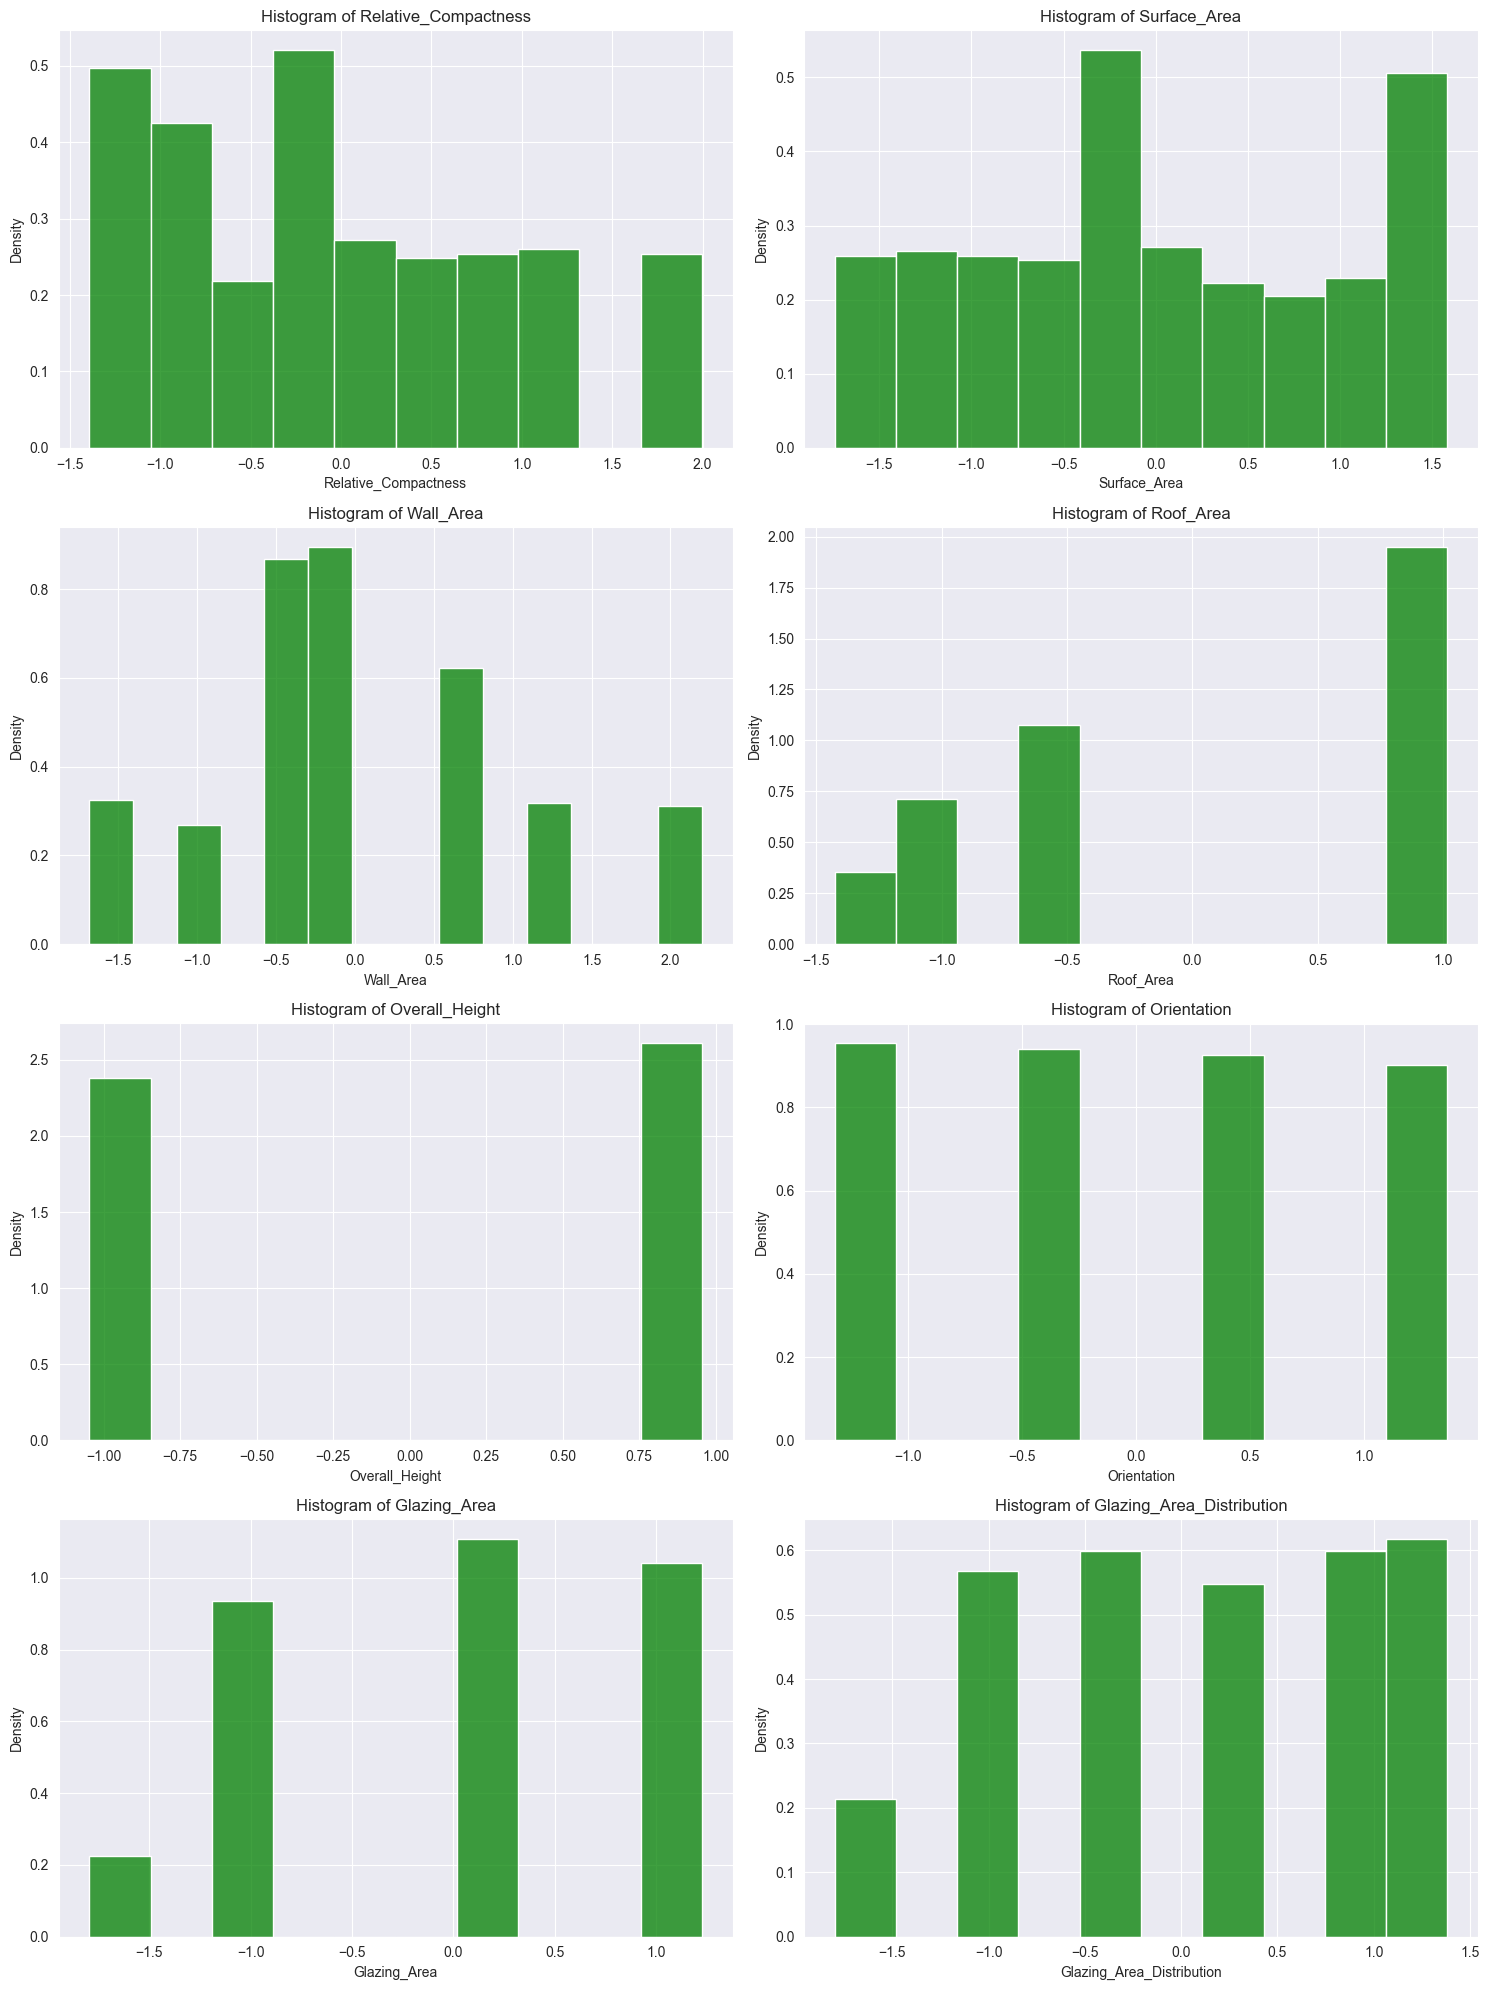

In [11]:
n_features = len(scaled_train_features_df.columns)
n_rows = (n_features + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.tight_layout(pad=3.0)

for x, feature in enumerate(scaled_train_features_df.columns):
    row = x // 2
    col = x % 2

    sns.histplot(data=scaled_train_features_df, x=feature, stat="density", color="green", ax=axes[row, col])
    axes[row, col].set_title(f"Histogram of {feature}")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Density")

if n_features % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()


In [12]:
for feature in scaled_train_features_df.columns:
    print(f"Feature: {feature}, Number of unique values: {scaled_train_features_df[feature].nunique()}")


Feature: Relative_Compactness, Number of unique values: 12
Feature: Surface_Area, Number of unique values: 12
Feature: Wall_Area, Number of unique values: 7
Feature: Roof_Area, Number of unique values: 4
Feature: Overall_Height, Number of unique values: 2
Feature: Orientation, Number of unique values: 4
Feature: Glazing_Area, Number of unique values: 4
Feature: Glazing_Area_Distribution, Number of unique values: 6


- Except Relative_Compactness and Roof_Area and Overall_Height, other features seems to have very few unique values.
- Converting these features into categorical variables might be more beneficial.

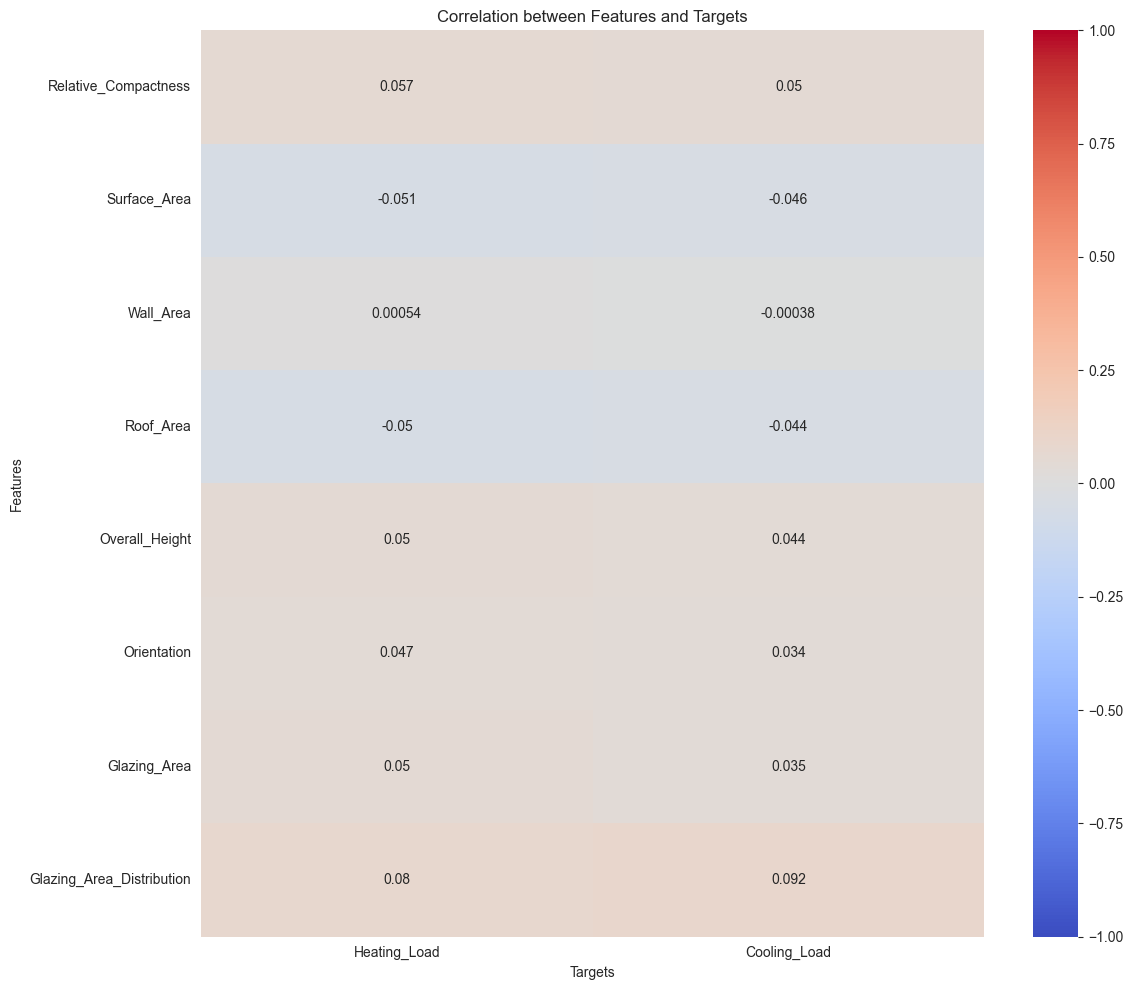

In [13]:
correlation_matrix = pd.DataFrame(index=scaled_train_features_df.columns, columns=train_targets_df.columns)
for feature in scaled_train_features_df.columns:
    for target in train_targets_df.columns:
        correlation_matrix.loc[feature, target] = scaled_train_features_df[feature].corr(train_targets_df[target])
correlation_matrix = correlation_matrix.astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation between Features and Targets")
plt.xlabel("Targets")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


- The best linear correlation coefficient found among the features and targets is only up to -12%, which is not very high.
- It suggests the linear relationship between these original  features and the targets is not strong.

In [14]:
scaled_train_features_df.corr()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
Relative_Compactness,1.000000,-0.991676,-0.218184,-0.865285,0.822064,-0.022033,0.025856,0.010288
Surface_Area,-0.991676,1.000000,0.209079,0.877904,-0.853974,0.024514,-0.023427,-0.012777
Wall_Area,-0.218184,0.209079,1.000000,-0.284703,0.273935,0.052631,-0.025944,-0.017724
Roof_Area,-0.865285,0.877904,-0.284703,1.000000,-0.971269,-0.001741,-0.010261,-0.003847
Overall_Height,0.822064,-0.853974,0.273935,-0.971269,1.000000,0.001850,0.005773,0.005059
Orientation,-0.022033,0.024514,0.052631,-0.001741,0.001850,1.000000,0.010287,0.003445
Glazing_Area,0.025856,-0.023427,-0.025944,-0.010261,0.005773,0.010287,1.000000,0.278598
Glazing_Area_Distribution,0.010288,-0.012777,-0.017724,-0.003847,0.005059,0.003445,0.278598,1.000000


- Some features (such as Relative_Compactness, Surface_Area, Roof_Area and Overall_Height) are highly correlated linearly.
- They will need to be removed or transformed by doing a PCA, before computing a linear model.

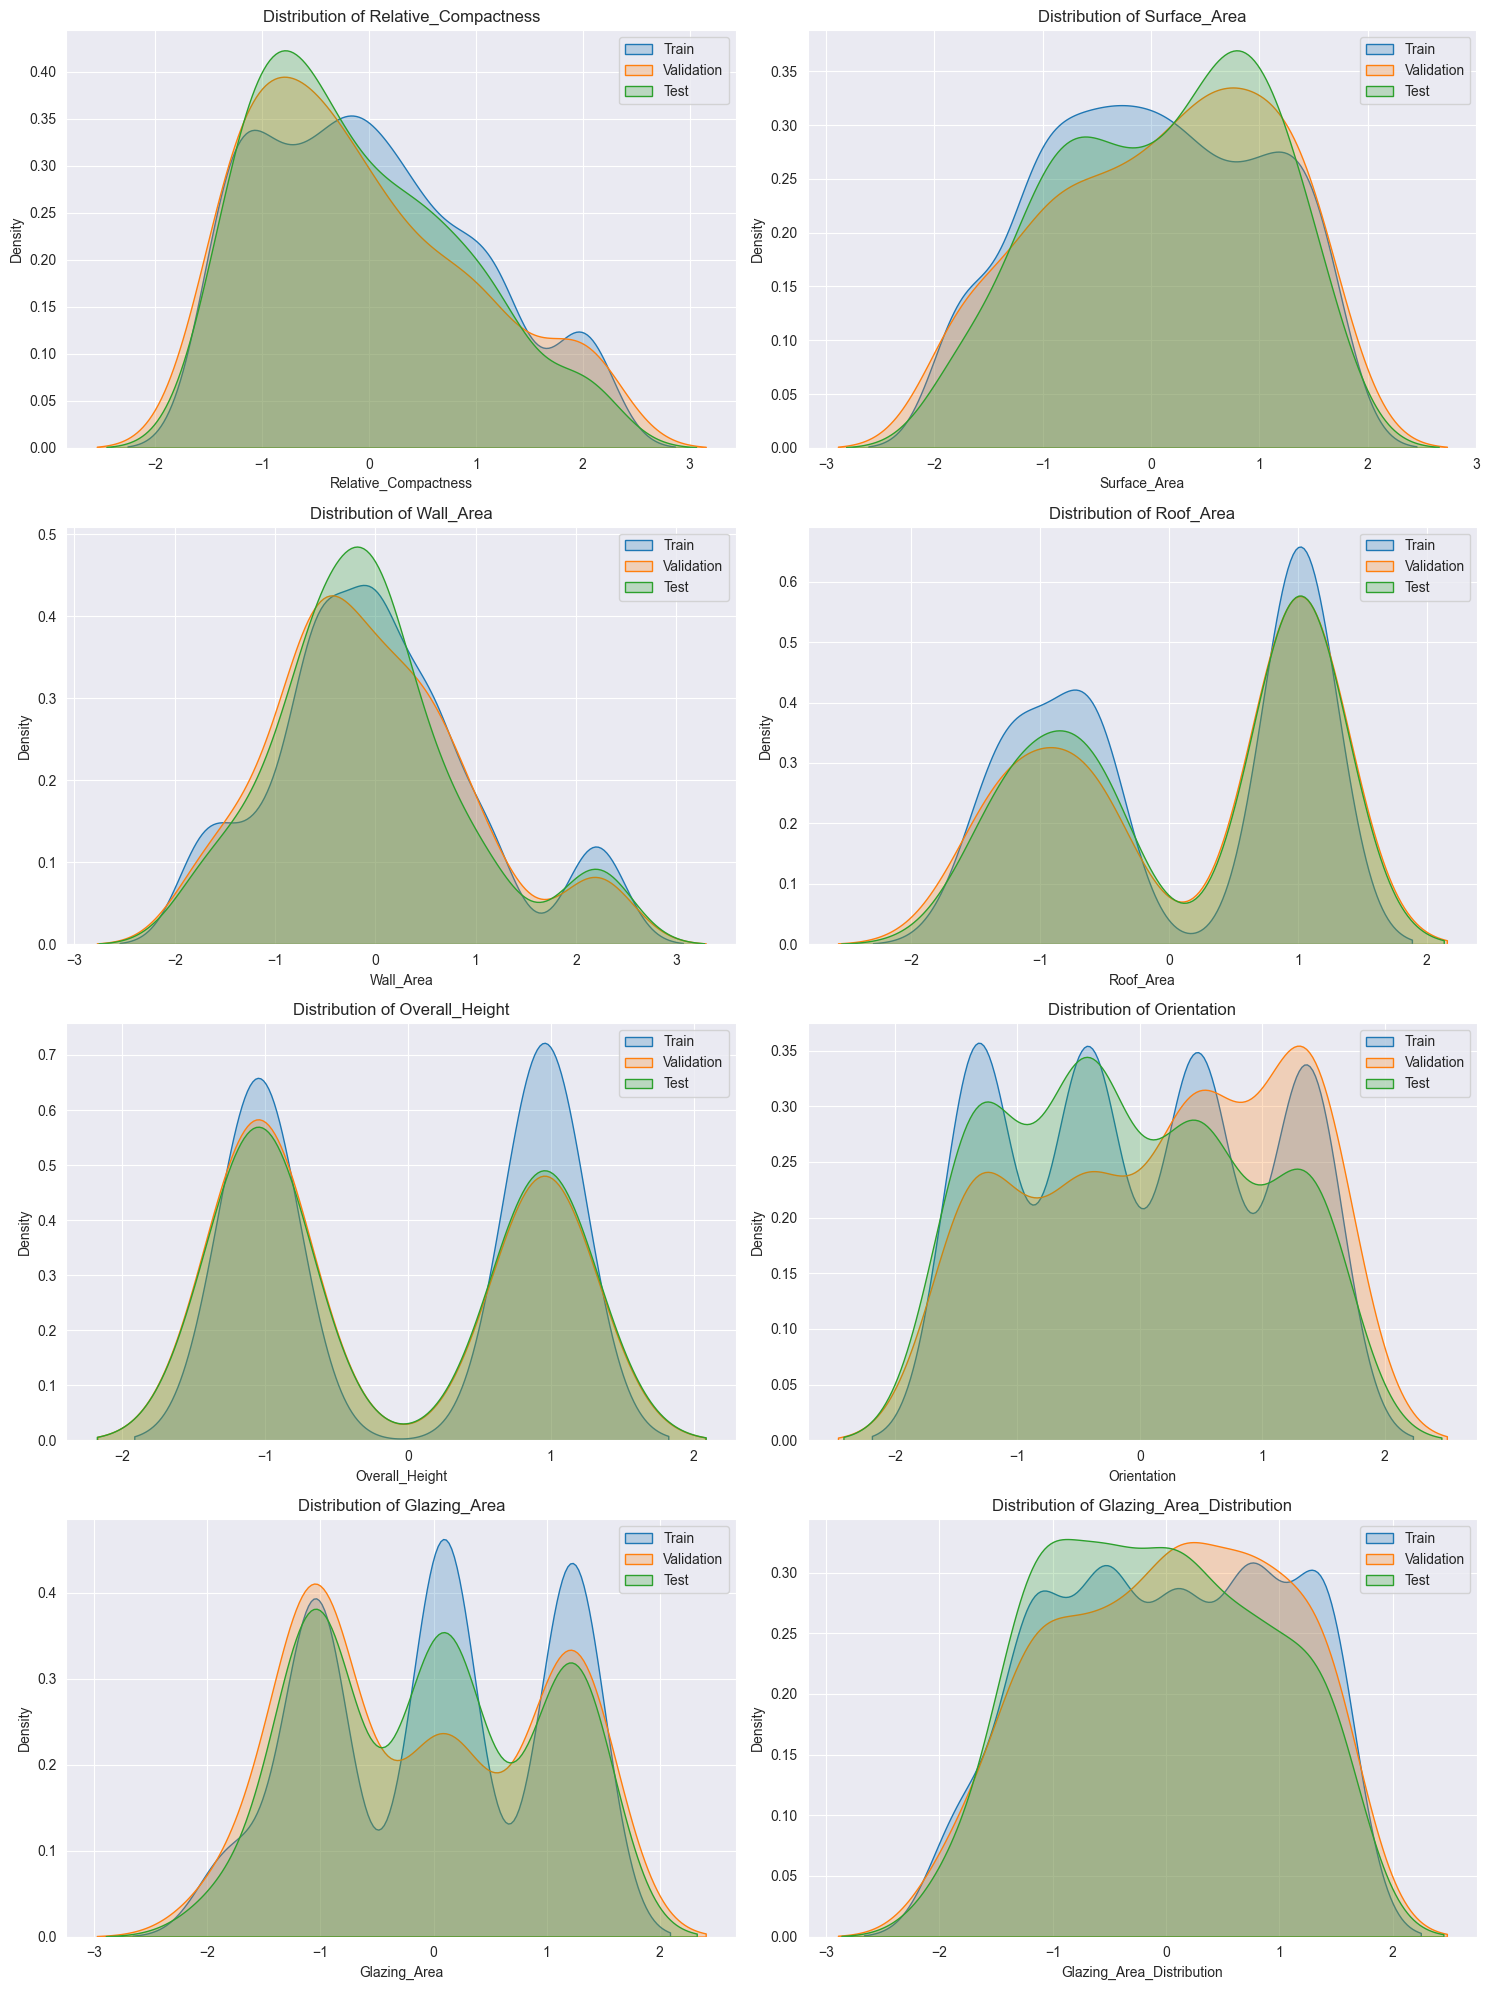

In [15]:
n_features = len(scaled_train_features_df.columns)
n_rows = (n_features + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.tight_layout(pad=3.0)

for x, feature in enumerate(scaled_train_features_df.columns):
    row = x // 2
    col = x % 2

    ax = axes[row, col] if n_rows > 1 else axes[col]

    sns.kdeplot(data=scaled_train_features_df[feature], label="Train", fill=True, ax=ax)
    sns.kdeplot(data=scaled_val_features_df[feature], label="Validation", fill=True, ax=ax)
    sns.kdeplot(data=scaled_test_features_df[feature], label="Test", fill=True, ax=ax)

    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend()

if n_features % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()


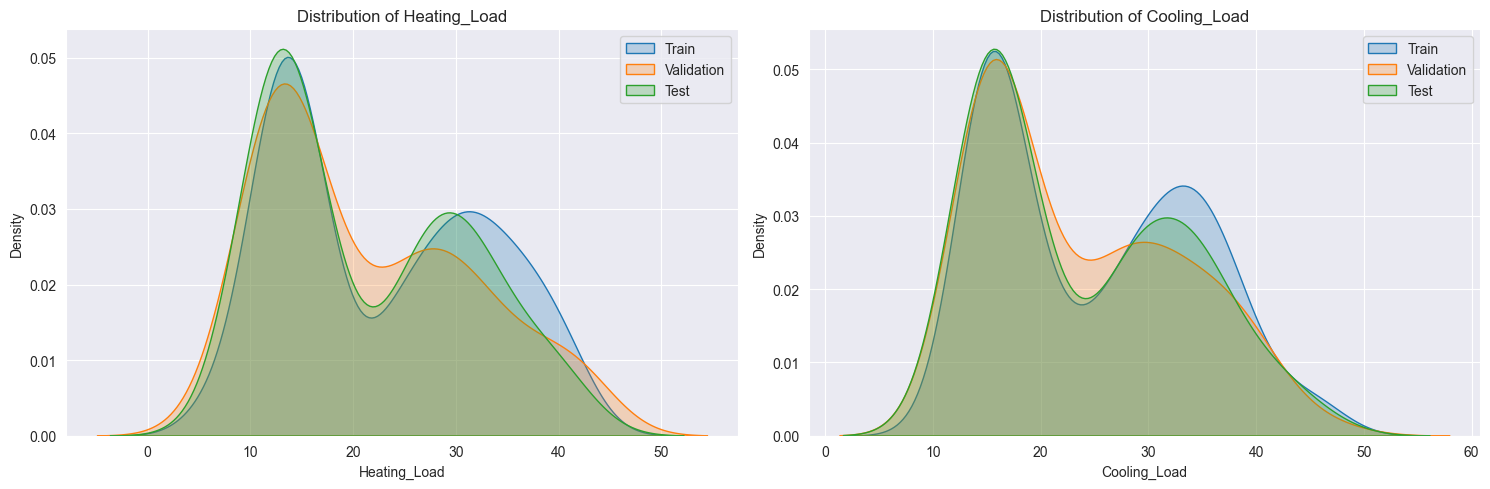

In [16]:
n_features = len(train_targets_df.columns)
n_rows = (n_features + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.tight_layout(pad=3.0)

for x, target in enumerate(train_targets_df.columns):
    row = x // 2
    col = x % 2

    ax = axes[row, col] if n_rows > 1 else axes[col]

    sns.kdeplot(data=train_targets_df[target], label="Train", fill=True, ax=ax)
    sns.kdeplot(data=val_targets_df[target], label="Validation", fill=True, ax=ax)
    sns.kdeplot(data=test_targets_df[target], label="Test", fill=True, ax=ax)

    ax.set_title(f"Distribution of {target}")
    ax.set_xlabel(target)
    ax.set_ylabel("Density")
    ax.legend()

if n_features % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()


In [17]:
del correlation_matrix
gc.collect()


26618

## Linear models

### pca

In [18]:
training_results = pca_regression(
    features_df=scaled_train_features_df,
    targets_df=train_targets_df,
    operation_mode="train",
)


In [19]:
validation_results = pca_regression(
    features_df=scaled_val_features_df,
    targets_df=val_targets_df,
    operation_mode="validate/test",
    n_components=training_results["n_components"],
    prediction_models=training_results,
)


In [20]:
for target_name in [key for key in training_results.keys() if key != "n_components"]:
    print("----------------------------------------")
    print(f"For Target: {target_name}")
    print(f"Train R_squared: {training_results[target_name]['r_squared']:.4f}")
    print(f"Train MSE: {training_results[target_name]['mse']:.4f}")
    print(f"Validation R_squared: {validation_results[target_name]['r_squared']:.4f}")
    print(f"Validation MSE: {validation_results[target_name]['mse']:.4f}")
    print("----------------------------------------\n")


----------------------------------------
For Target: Heating_Load
Train R_squared: 0.8561
Train MSE: 14.9128
Validation R_squared: 0.3543
Validation MSE: 65.0876
----------------------------------------

----------------------------------------
For Target: Cooling_Load
Train R_squared: 0.8194
Train MSE: 16.6445
Validation R_squared: 0.3432
Validation MSE: 55.3681
----------------------------------------



- Linear models using PCA components have shown high R-squared values (at least 0.8) during the training for both targets.
- However, on test sets these models performance are too low : we got low R_squared (no more than 0.35) and high mean squared values (at least 3 times higher than those obtained during training). We can conclude that both models are overfitting.

### pca + ridge

In [21]:
gc.collect()

26563

## Non Linear models

### pca + decision tree

### pca + random forest